# Регрессионный анализ
[Wiki]
(https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [174]:
df = pd.read_csv(r'D:\МИРЭА\Методы ИИ\processed.cleveland.data')

In [175]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 303
Total number of columns in dataset = 14


In [176]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [177]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


In [178]:
target_col = "num"

In [179]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Линейная регрессия (statsmodels)

In [181]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [182]:
results = model.fit()
results.params

const      -1.001397
age        -0.004183
sex         0.247245
cp          0.196930
trestbps    0.003064
chol        0.000651
fbs         0.201191
restecg     0.085427
thalach    -0.004420
exang       0.321471
oldpeak     0.175981
slope       0.143317
ca          0.417027
thal        0.122265
dtype: float64

In [183]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    num   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     19.52
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.86e-29
Time:                        22:26:31   Log-Likelihood:                -257.00
No. Observations:                 212   AIC:                             542.0
Df Residuals:                     198   BIC:                             589.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0014      0.956     -1.048      0.2

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:

b0 = -1.0014

b1 = -0.0042

b2 = 0.2472

b3 = 0.1969

b4 = 0.0031

b5 = 0.0007

b6 = 0.2012

b7 = 0.0854

b8 = -0.0044

b9 = 0.3215

b10 = 0.1760

b11 = 0.1433

b12 = 0.4170

b13 = 0.1223 


2. Коэффициент детерминации R-squared = 0.562, его скорректированная оценка Adj. R-squared = 0.533 - это означает, что регрессионная модель объясняет 53% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 19.52

>расчетный уровень значимости Prob (F-statistic) = 5.86e-29

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b3, b9, b10, b12, b13 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b0, b1, b2, b4, b5, b6, b7, b8, b11 превышает 0.05. Нулевая гипотеза не отвергается. b0, b1, b2, b4, b5, b6, b7, b8, b11 не явля.тся значимымb.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значения t для b0, b1, b2, b4, b5, b6, b7, b8, b11 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

In [184]:
new_df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7, 10]], axis = 1)
print ("Total number of rows in dataset = {}".format(new_df.shape[0]))
print ("Total number of columns in dataset = {}".format(new_df.shape[1]))

Total number of rows in dataset = 303
Total number of columns in dataset = 6


In [185]:
print(new_df.head())

    cp  exang  oldpeak   ca  thal  num
0  1.0    0.0      2.3  0.0   6.0    0
1  4.0    1.0      1.5  3.0   3.0    2
2  4.0    1.0      2.6  2.0   7.0    1
3  3.0    0.0      3.5  0.0   3.0    0
4  2.0    0.0      1.4  0.0   3.0    0


In [186]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       303 non-null    float64
 1   exang    303 non-null    float64
 2   oldpeak  303 non-null    float64
 3   ca       303 non-null    float64
 4   thal     303 non-null    float64
 5   num      303 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.3 KB
None


In [187]:
target_col = "num"
X = new_df.loc[:, new_df.columns != target_col]
y = new_df.loc[:, target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.30,
 random_state=42)

In [188]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
print(results.params)

const     -1.086394
cp         0.191931
exang      0.402591
oldpeak    0.241729
ca         0.430829
thal       0.158288
dtype: float64


In [189]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    num   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     47.34
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.90e-32
Time:                        22:26:32   Log-Likelihood:                -263.34
No. Observations:                 212   AIC:                             538.7
Df Residuals:                     206   BIC:                             558.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0864      0.234     -4.636      0.0

In [190]:
X_test = sm.add_constant(X_test)

In [191]:
y_pred = results.predict(X_test)

In [192]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

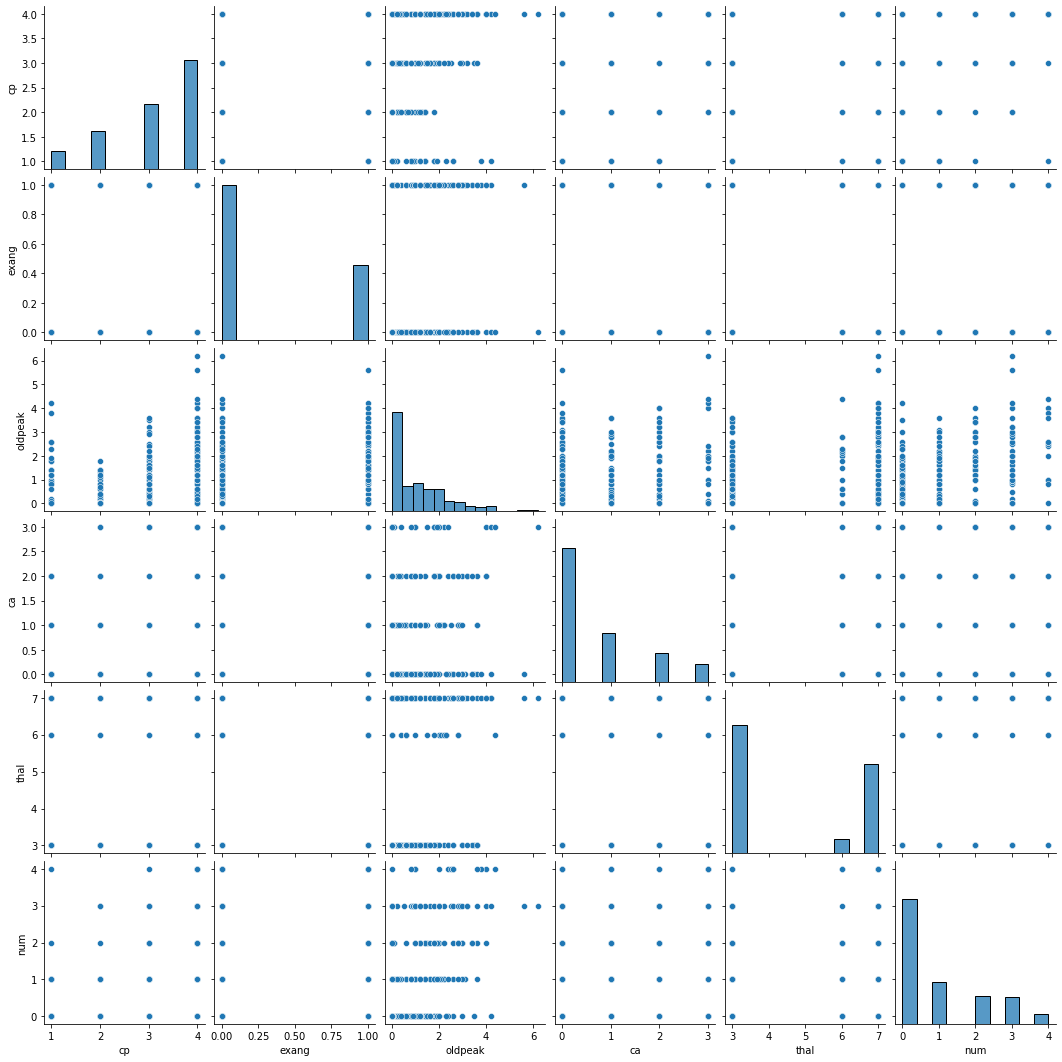

In [193]:
sns.pairplot(new_df)
plt.show()

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [194]:
cols_num = ['cp', 'exang', 'oldpeak', 'ca', 'thal', 'num']
correlation = new_df.corr().loc[cols_num, cols_num]
print(correlation)

               cp     exang   oldpeak        ca      thal       num
cp       1.000000  0.384060  0.202277  0.218137  0.262089  0.407075
exang    0.384060  1.000000  0.288223  0.133952  0.325240  0.397057
oldpeak  0.202277  0.288223  1.000000  0.258143  0.342405  0.504092
ca       0.218137  0.133952  0.258143  1.000000  0.252316  0.479665
thal     0.262089  0.325240  0.342405  0.252316  1.000000  0.507155
num      0.407075  0.397057  0.504092  0.479665  0.507155  1.000000


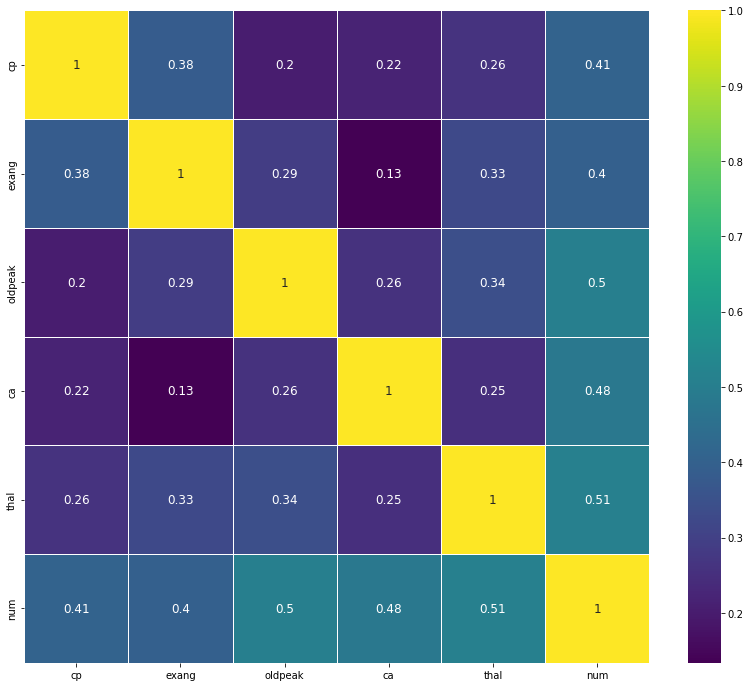

In [195]:
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation,
 linewidths=0.5, annot=True,cmap='viridis',
 linecolor="white", annot_kws = {'size':12})
plt.show()

In [196]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T)

           cp     exang   oldpeak        ca      thal
vif  5.899867  1.850312  2.165545  1.747935  6.149517


# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

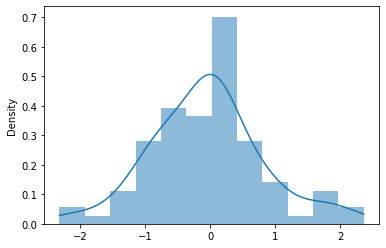

In [197]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)
plt.show()

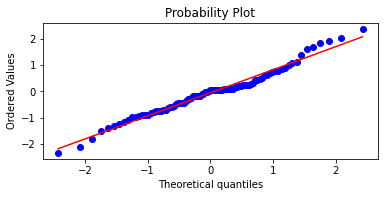

In [198]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [199]:
np.mean(residual)

-0.052499925976614015

# Гомоскедастичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. Предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация нас не устраивает. Нам важно, чтобы качество модели было одно и то же при любых значениях независимой переменной.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

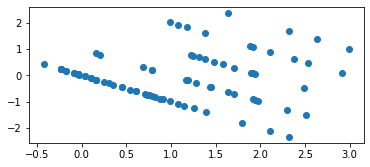

In [200]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)
plt.show()

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

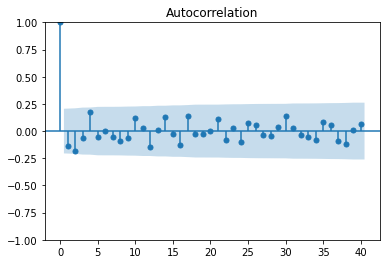

In [201]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
plt.show()


## Матрицами 

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [202]:
X_train = sm.add_constant(X_train)
xtx = np.dot(X_train.T, X_train)
xtxi = np.dot(np.linalg.inv(np.matmul(xtx.T,xtx)),xtx.T)
xty = np.dot(X_train.T, y_train)
b = np.dot(xtxi, xty)
print(b)

[-1.08639362  0.19193057  0.40259085  0.24172922  0.43082904  0.15828751]


In [203]:
y_pred = np.dot(X_test,b.T)
print('Mean squared error: %.2f'
 % np.square(y_test - y_pred).mean())

Mean squared error: 0.75


In [204]:
from sklearn.metrics import mean_squared_error
print('Mean squared error (sklearn): %.2f'
 % mean_squared_error(y_test, y_pred))

Mean squared error (sklearn): 0.75


In [205]:
rss = np.sum(np.square(y_test - y_pred))
ess = np.sum(np.square(y_test - y_test.mean()))
print('Coefficient of determination: %.2f'
 % (1 - (rss / ess)))

Coefficient of determination: 0.49


In [206]:
from sklearn.metrics import r2_score
print('Coefficient of determination (sklearn): %.2f'
 % r2_score(y_test, y_pred))

Coefficient of determination (sklearn): 0.49


## Градиентным спуском  

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [207]:
N = X_train.shape[0]
rows = X_train.shape[1]
params = np.zeros(rows)
X = X_train.to_numpy()
y = y_train.to_numpy()

In [208]:
eps = 0.00000001
errors = [1, 0]
grad = np.zeros(rows)
while abs(errors[-1] - errors[-2]) > eps:
    predictions = (params @ X.T).T
    error = (1/N) * sum((predictions - y) ** 2)
    errors.append(error)
    for feat in range(rows):
        grad[feat] = 2/N * sum(X[:, feat] * (predictions - y))
        params[feat] -= 0.001 * grad[feat]
print(params)


[-1.06001318  0.18601905  0.40912686  0.24179079  0.43165545  0.15629986]


In [209]:
print('Mean squared error: %.2f'
 % error)

Mean squared error: 0.70


### Построение регрессионной зависимостьи с помощью библиотеки sklearn

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = df.loc[:, df.columns!=df.columns[-1]]
y = df.loc[:,df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30,
random_state=42)

pipeline_ = Pipeline([('feature_scaling', StandardScaler()), ('sgd', SGDRegressor(
max_iter=10000, early_stopping=True, eta0=0.1, tol=1e-9, validation_fraction=0.2,
n_iter_no_change=10, average=20, random_state=42))])
pipeline_.fit(X_train,y_train)
pipeline_.steps[1][1].coef_

array([-0.10865064,  0.06862717,  0.19200067,  0.04903415,  0.07925448,
        0.11790048,  0.01953148, -0.09851849,  0.07456989,  0.23353073,
        0.14857097,  0.36011857,  0.28835474])

In [216]:
y_pred = pipeline_.predict(X_test)
y_pred[:10]

array([1.45926056, 1.07289217, 1.59102631, 1.01565945, 1.43373762,
       2.35564116, 1.98565005, 2.63774451, 0.8290871 , 1.00059837])

In [217]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.780318010220909


# Задание
1. Выбрать датасет https://archive-beta.ics.uci.edu/.
2. Проанализировать результаты, полученные с помощью statsmodels (шаги выше).
3. Построить регрессионную зависимость с помощью метода наименьших квадратов, используя вычисление обратной матрицы. 
4. Построить регрессионную зависимость с помощью метода наименьших квадратов, используя метод градиентного спуска (используя приведенные формулы). Сравнить с результатами sklearn.
4. Сравнить и описать результаты.


# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей